Q4.1

In [178]:
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.decomposition import PCA
import glob

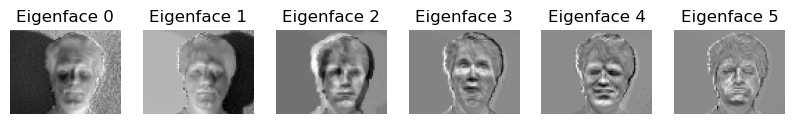

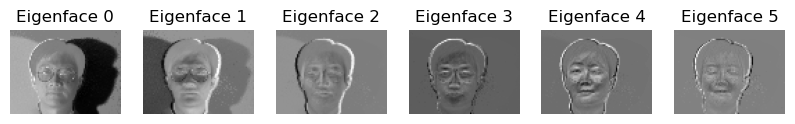

Test image 1 matches Subject 1
Test image 2 matches Subject 2


In [180]:
import os

output_dir = 'outputs'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

subject1_images = [
    'data/yalefaces/subject01.glasses.gif', 'data/yalefaces/subject01.happy.gif', 'data/yalefaces/subject01.leftlight.gif',
    'data/yalefaces/subject01.noglasses.gif', 'data/yalefaces/subject01.normal.gif', 'data/yalefaces/subject01.rightlight.gif',
    'data/yalefaces/subject01.sad.gif', 'data/yalefaces/subject01.sleepy.gif', 'data/yalefaces/subject01.surprised.gif', 'data/yalefaces/subject01.wink.gif'
]

subject2_images = [
    'data/yalefaces/subject02.glasses.gif', 'data/yalefaces/subject02.happy.gif', 'data/yalefaces/subject02.leftlight.gif',
    'data/yalefaces/subject02.noglasses.gif', 'data/yalefaces/subject02.normal.gif', 'data/yalefaces/subject02.rightlight.gif',
    'data/yalefaces/subject02.sad.gif', 'data/yalefaces/subject02.sleepy.gif', 'data/yalefaces/subject02.wink.gif'
]

# Load images
def img_load(image_paths):
    images = [np.array(Image.open(path).convert('L')) for path in image_paths]
    return images

def img_prep(image, factor=4):
    downsampled = image[::factor, ::factor]
    return downsampled.flatten()

# PCA and downsize by factor of 4
def pca_function(image_paths, n_components=6, factor=4):
    images = img_load(image_paths)
    data_matrix = np.array([img_prep(img, 4) for img in images])
    mean_image = np.mean(data_matrix, axis=0)
    centered_data = data_matrix - mean_image
    pca = PCA(n_components=6)
    pca.fit(centered_data)
    return pca.components_, mean_image

# Compute and visulaize eigenfaces
subject1_eigenfaces, subject1_mean = pca_function(subject1_images)
subject2_eigenfaces, subject2_mean = pca_function(subject2_images)

def save_eigenfaces(eigenfaces, image_shape, subject_label):
    plt.figure(figsize=(10, 5))
    for i, eigenface in enumerate(eigenfaces):
        plt.subplot(1, len(eigenfaces), i+1)
        plt.imshow(eigenface.reshape(image_shape), cmap='gray')
        plt.axis('off')  
        plt.title(f'Eigenface {i}')
        
        output_path = os.path.join(output_dir, f'Q4.1_{subject_label}_eigenface_{i}.png')
        plt.savefig(output_path)

    plt.show()

image_shape = (61, 80)  

# Save eigenfaces for each subject
save_eigenfaces(subject1_eigenfaces, image_shape, 'subject1')
save_eigenfaces(subject2_eigenfaces, image_shape, 'subject2')

# Compute residual
def calculate_residual(test_image, eigenfaces, mean_image, factor=4):
    test_vector = img_prep(np.array(test_image), 4)
    centered_test = test_vector - mean_image
    projection = np.dot(eigenfaces.T, np.dot(eigenfaces, centered_test))
    residual = np.linalg.norm(centered_test - projection)
    return residual

# Compute residuals
residual1_subject1 = calculate_residual(test_image1, subject1_eigenfaces, subject1_mean)
residual1_subject2 = calculate_residual(test_image1, subject2_eigenfaces, subject2_mean)
residual2_subject1 = calculate_residual(test_image2, subject1_eigenfaces, subject1_mean)
residual2_subject2 = calculate_residual(test_image2, subject2_eigenfaces, subject2_mean)

# Face pattern recognition
def face_pattern(r11, r12, r21, r22):
    if r11 < r12:
        print("Test image 1 matches Subject 1")
    else:
        print("Test image 1 matches Subject 2")

    if r21 < r22:
        print("Test image 2 matches Subject 1")
    else:
        print("Test image 2 matches Subject 2")

face_pattern(residual1_subject1, residual1_subject2, residual2_subject1, residual2_subject2)

Q4.2

In [187]:
#Load images and apply functions
def load_and_preprocess_image(filepath):
  img = Image.open(filepath).convert('L') 
  img = downsize_image(img)  
  img_vector = flatten_image(img)  
  return img_vector

# Load test images
test_image1_vector = load_and_preprocess_image('data/yalefaces/subject01-test.gif')
test_image2_vector = load_and_preprocess_image('data/yalefaces/subject02-test.gif')

In [189]:
# Functions to downsize, transform and calculate eigenfaces
def downsize_image(image):
    return image.resize((image.width // 4, image.height // 4), Image.LANCZOS)

def flatten_image(image):
    return np.array(image).flatten()

def compute_eigenfaces_and_residual(image_vectors, test_image):
    mean = np.mean(image_vectors, axis=0)
    centered_images = image_vectors - mean
    covariance_matrix = np.cov(centered_images, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    top_eigenface = eigenvectors[:, np.argmax(eigenvalues)]

    centered_test_image = test_image - mean
    projection = top_eigenface.T @ centered_test_image
    reconstruction = top_eigenface * projection
    residual = np.linalg.norm(centered_test_image - reconstruction) ** 2

    return top_eigenface, mean, residual

projection_results = []

In [191]:
for n in num_eigenfaces_list:
    # Compute the projection residuals for test images with respect to both sets of eigenfaces
    residual_s1_ef1 = compute_projection_residual(test_image1_vector, eigenfaces_subject1[:, :1], mean_subject1)
    residual_s1_ef2 = compute_projection_residual(test_image1_vector, eigenfaces_subject2[:, :1], mean_subject2)
    residual_s2_ef1 = compute_projection_residual(test_image2_vector, eigenfaces_subject1[:, :1], mean_subject1)
    residual_s2_ef2 = compute_projection_residual(test_image2_vector, eigenfaces_subject2[:, :1], mean_subject2)

    # Store the results
    projection_results.append((n, residual_s1_ef1, residual_s1_ef2, residual_s2_ef1, residual_s2_ef2))

# Print the projection residuals
print(f"{'Top Eigenfaces':>10} {'Residual S11':>20} {'Residual S12':>20} {'Residual S21':>20} {'Residual S22':>20}")
for result in projection_results:
    n, residual_s1_ef1, residual_s1_ef2, residual_s2_ef1, residual_s2_ef2 = result
    print(f"{n:>10} {residual_s1_ef1:>20.4f} {residual_s1_ef2:>20.4f} {residual_s2_ef1:>20.4f} {residual_s2_ef2:>20.4f}")

def face_patterns(projection_results):
    for n, residual_s1_ef1, residual_s1_ef2, residual_s2_ef1, residual_s2_ef2 in projection_results:
        if residual_s1_ef1 < residual_s1_ef2:
            print("Test image 1 matches Subject 1")
        else:
            print("Test image 1 matches Subject 2")
        
        if residual_s2_ef1 < residual_s2_ef2:
            print("Test image 2 matches Subject 1")
        else:
            print("Test image 2 matches Subject 2")

face_patterns(projection_results)


Top Eigenfaces         Residual S11         Residual S12         Residual S21         Residual S22
         1         6742872.4473        32746524.6021        39491807.8305         3735545.1083
Test image 1 matches Subject 1
Test image 2 matches Subject 2
